In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF, WhiteKernel


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,111)

In [5]:
virtual_samples

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

## define a callable Kriging model and sampling function

In [6]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_obs = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_obs.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_obs))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_obs)


# fixed noise level


In [7]:
# instantiate Bgolearn
Bgolearn = BGOS.Bgolearn()
method_name = 'KG'

obs = 5
tolerance = 0.05

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.8602458348216735
2 -th sampling, result =  3.2082070910006784
3 -th sampling, result =  3.363091104865193
4 -th sampling, result =  3.036777212446092
5 -th sampling, result =  3.552551046286354
evaluated mean of added datum: [3.40417446]
evaluated std of added datum: 0.2846360832999076
---------------------------------------

1-th iteration 
 new added datum: (8.0, array([3.

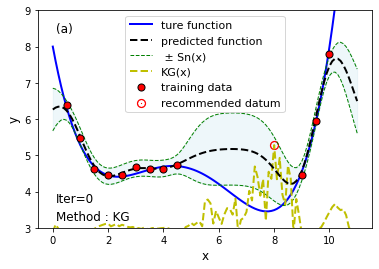

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.4106092647199637
2 -th sampling, result =  3.3071927034625057
3 -th sampling, result =  3.9251869169887357
4 -th sampling, result =  3.0783966631830424
5 -th sampling, result =  2.977595493765359
evaluated mean of added datum: [3.33979621]
evaluated std of added datum: 0.3311431228647464
---------------------------------------

2-th iteration 
 new added datum: (7.5, array([3.33979621]))


<Figure size 432x288 with 0 Axes>

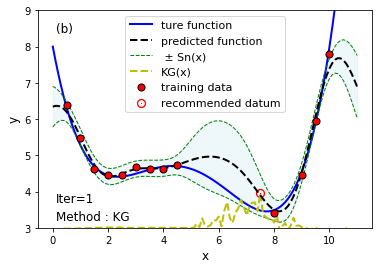

last response =  3.404174457883998
added datum y =  [3.33979621] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [8]:
guessed_noise_std = 0.3
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G(MC_num=50)*10+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
   
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

'a'

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.2207671948260272
2 -th sampling, result =  2.813870710231819
3 -th sampling, result =  2.022947705786134
4 -th sampling, result =  3.102827315100625
5 -th sampling, result =  4.05083882720633
evaluated mean of added datum: [3.04225035]
evaluated std of added datum: 0.6548165681017624
---------------------------------------

1-th iteration 
 new added datum: (8.1, array([3.0

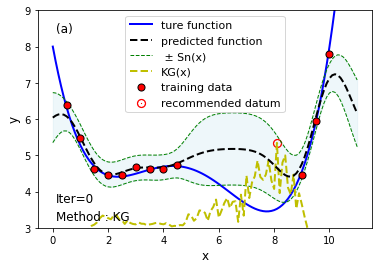

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.2]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  2.942681730906509
2 -th sampling, result =  3.9809626767522786
3 -th sampling, result =  3.105195756417473
4 -th sampling, result =  3.1362097730127663
5 -th sampling, result =  4.1583268884861795
evaluated mean of added datum: [3.46467537]
evaluated std of added datum: 0.5014573984799492
---------------------------------------

2-th iteration 
 new added datum: (7.2, array([3.46467537]))


<Figure size 432x288 with 0 Axes>

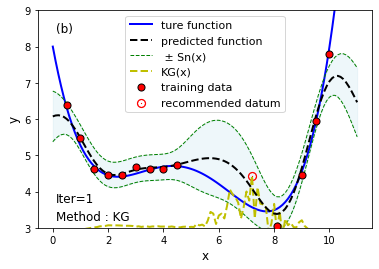

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.2]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.986967713781469
2 -th sampling, result =  2.9134145573320946
3 -th sampling, result =  4.383829688542758
4 -th sampling, result =  3.612667250502126
5 -th sampling, result =  4.405528320800795
evaluated mean of added datum: [3.86048151]
evaluated std of added datum: 0.5559344964546346
---------------------------------------

3-th iteration 
 new added datum: (6.2, array([3.86048151]))


<Figure size 432x288 with 0 Axes>

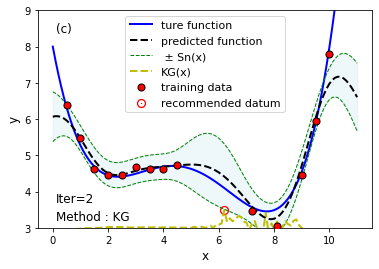

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.7]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  4.000098257063461
2 -th sampling, result =  3.678196484821656
3 -th sampling, result =  4.3903398447973565
4 -th sampling, result =  4.04626875838489
5 -th sampling, result =  3.930138715204531
evaluated mean of added datum: [4.00900841]
evaluated std of added datum: 0.22914551976814174
---------------------------------------

4-th iteration 
 new added datum: (6.7, array([4.00900841]))


<Figure size 432x288 with 0 Axes>

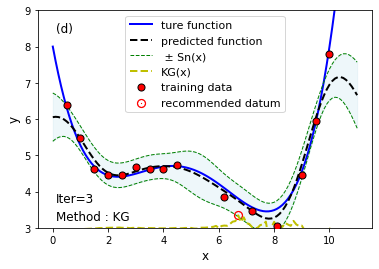

last response =  3.8604815061918485
added datum y =  [4.00900841] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [12]:
guessed_noise_std = 0.5
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G(MC_num=50)*10+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.7]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.6976927153540604
2 -th sampling, result =  3.296574791883412
3 -th sampling, result =  4.142945424367414
4 -th sampling, result =  3.0646697030340766
5 -th sampling, result =  4.699421595157731
evaluated mean of added datum: [3.78026085]
evaluated std of added datum: 0.5880879126821545
---------------------------------------

1-th iteration 
 new added datum: (8.70000000000

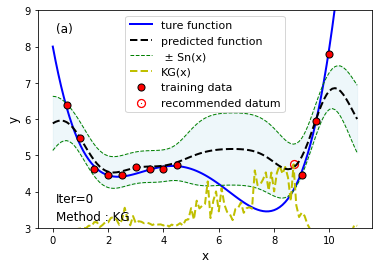

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.060360571626331
2 -th sampling, result =  3.729670024847344
3 -th sampling, result =  3.110939442039407
4 -th sampling, result =  3.84582497245769
5 -th sampling, result =  3.607257265170603
evaluated mean of added datum: [3.47081046]
evaluated std of added datum: 0.32380183753093505
---------------------------------------

2-th iteration 
 new added datum: (8.1, array([3.47081046]))


<Figure size 432x288 with 0 Axes>

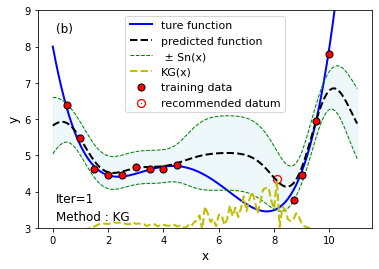

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.3]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.7988372463767432
2 -th sampling, result =  4.191287840267666
3 -th sampling, result =  3.3848457009257507
4 -th sampling, result =  3.066770980899174
5 -th sampling, result =  4.569123932992056
evaluated mean of added datum: [3.80217314]
evaluated std of added datum: 0.5393724917042458
---------------------------------------

3-th iteration 
 new added datum: (7.300000000000001, array([3.80217314]))


<Figure size 432x288 with 0 Axes>

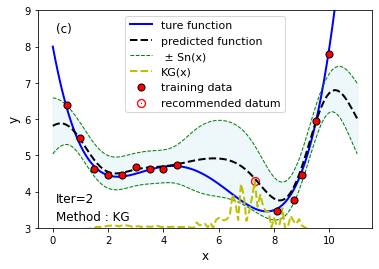

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.7]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.4700680358695477
2 -th sampling, result =  4.412728926567726
3 -th sampling, result =  2.8561955312782894
4 -th sampling, result =  3.570821666517403
5 -th sampling, result =  3.502675659009048
evaluated mean of added datum: [3.56249796]
evaluated std of added datum: 0.49677904544972057
---------------------------------------

4-th iteration 
 new added datum: (7.7, array([3.56249796]))


<Figure size 432x288 with 0 Axes>

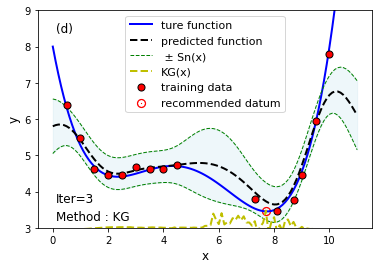

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [5.5]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.6076441902746375
2 -th sampling, result =  5.550418709179012
3 -th sampling, result =  4.362341167896801
4 -th sampling, result =  3.404646081694379
5 -th sampling, result =  3.684691311482583
evaluated mean of added datum: [4.32194829]
evaluated std of added datum: 0.753648870608574
---------------------------------------

5-th iteration 
 new added datum: (5.5, array([4.32194829]))


<Figure size 432x288 with 0 Axes>

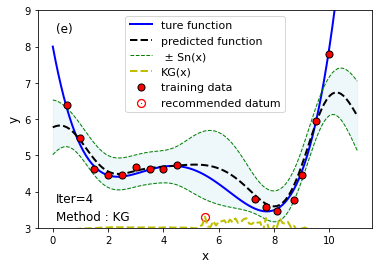

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.6]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.966838259367339
2 -th sampling, result =  3.2727665544430558
3 -th sampling, result =  4.327192089341448
4 -th sampling, result =  5.833807317669008
5 -th sampling, result =  3.5040012217307934
evaluated mean of added datum: [4.38092109]
evaluated std of added datum: 0.9438282741539575
---------------------------------------

6-th iteration 
 new added datum: (6.6000000000000005, array([4.38092109]))


<Figure size 432x288 with 0 Axes>

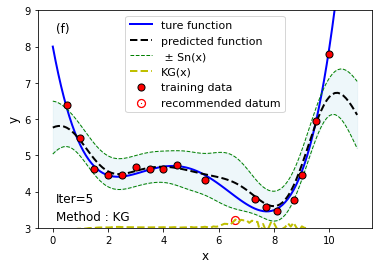

last response =  4.321948292105483
added datum y =  [4.38092109] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [13]:
guessed_noise_std = 0.7
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G(MC_num=50)*10+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

# optimal noise level of likelihood

In [14]:
def likelihood_opt_noise(xtrain,ytrain):
    noise_kernel = RBF() + WhiteKernel()
    noise_mdoel = GaussianProcessRegressor(kernel=noise_kernel,normalize_y=True).fit(xtrain,ytrain)
    optimal_noise = np.exp(noise_mdoel.kernel_.theta[1])
    return optimal_noise

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [10.1]
--------------Draw samples-------------
real std of added datum: 0.06713390624432107
1 -th sampling, result =  8.465466847114238
2 -th sampling, result =  8.495238990386884
3 -th sampling, result =  8.522569670967343
4 -th sampling, result =  8.490705547302502
5 -th sampling, result =  8.47539386681997
evaluated mean of added datum: [8.48987498]
evaluated std of added datum: 0.019513404914706125
---------------------------------------

1-th iteration 
 new added datum

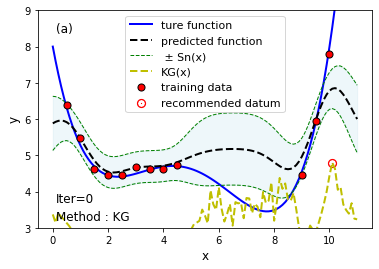

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.8]
--------------Draw samples-------------
real std of added datum: 0.10462776246237722
1 -th sampling, result =  3.584625451605257
2 -th sampling, result =  3.5438207647814717
3 -th sampling, result =  3.2929521866923923
4 -th sampling, result =  3.387516293174376
5 -th sampling, result =  3.328443043806997
evaluated mean of added datum: [3.42747155]
evaluated std of added datum: 0.11638987521388891
---------------------------------------

2-th iteration 
 new added datum: (7.800000000000001, array([3.42747155]))


<Figure size 432x288 with 0 Axes>

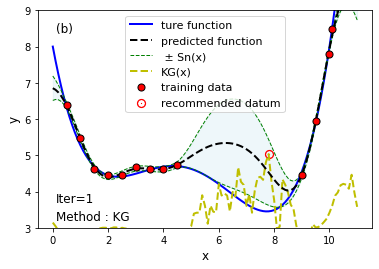

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.10021957833835334
1 -th sampling, result =  3.602074111566291
2 -th sampling, result =  3.675580885454349
3 -th sampling, result =  3.821426997056406
4 -th sampling, result =  3.685978916438789
5 -th sampling, result =  3.461472123702407
evaluated mean of added datum: [3.64930661]
evaluated std of added datum: 0.11762085393467384
---------------------------------------

3-th iteration 
 new added datum: (7.0, array([3.64930661]))


<Figure size 432x288 with 0 Axes>

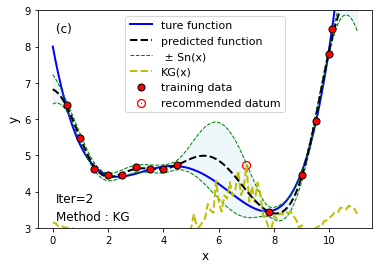

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.4]
--------------Draw samples-------------
real std of added datum: 0.09390555067678605
1 -th sampling, result =  4.160242911913054
2 -th sampling, result =  4.162989196918598
3 -th sampling, result =  3.9567821878150626
4 -th sampling, result =  3.901393600605857
5 -th sampling, result =  3.9982545880679865
evaluated mean of added datum: [4.0359325]
evaluated std of added datum: 0.10712758296402894
---------------------------------------

4-th iteration 
 new added datum: (6.4, array([4.0359325]))


<Figure size 432x288 with 0 Axes>

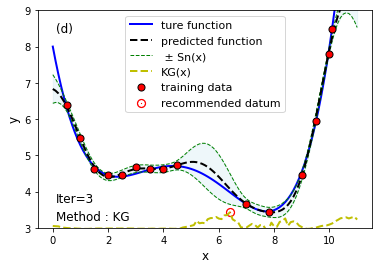

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [10.6]
--------------Draw samples-------------
real std of added datum: 0.08973722813540588
1 -th sampling, result =  11.871342899450006
2 -th sampling, result =  11.889406314497904
3 -th sampling, result =  11.699985959013876
4 -th sampling, result =  11.893114251064858
5 -th sampling, result =  11.909396617542106
evaluated mean of added datum: [11.85264921]
evaluated std of added datum: 0.07728427365137859
---------------------------------------

5-th iteration 
 new added datum: (10.600000000000001, array([11.85264921]))


<Figure size 432x288 with 0 Axes>

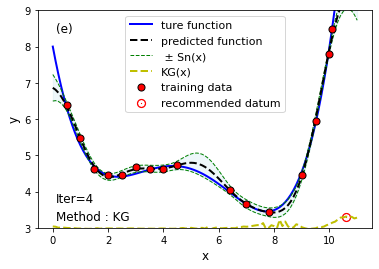

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.3]
--------------Draw samples-------------
real std of added datum: 0.08113682310809994
1 -th sampling, result =  3.5662350839973107
2 -th sampling, result =  3.5172043314356025
3 -th sampling, result =  3.698810712508696
4 -th sampling, result =  3.5747938772001437
5 -th sampling, result =  3.592545992893071
evaluated mean of added datum: [3.589918]
evaluated std of added datum: 0.05990229775408647
---------------------------------------

6-th iteration 
 new added datum: (8.3, array([3.589918]))


<Figure size 432x288 with 0 Axes>

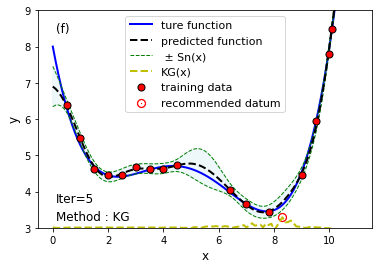

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.9]
--------------Draw samples-------------
real std of added datum: 0.06986769926063219
1 -th sampling, result =  3.3727191078295466
2 -th sampling, result =  3.4605191635930863
3 -th sampling, result =  3.432553783587315
4 -th sampling, result =  3.5418372309379844
5 -th sampling, result =  3.5567587085165737
evaluated mean of added datum: [3.4728776]
evaluated std of added datum: 0.06870507366918202
---------------------------------------

7-th iteration 
 new added datum: (7.9, array([3.4728776]))


<Figure size 432x288 with 0 Axes>

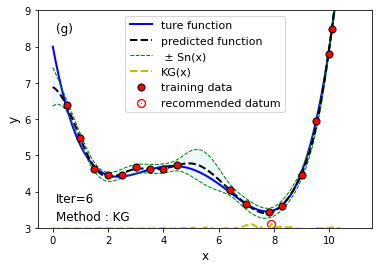

last response =  3.589917999606965
added datum y =  [3.4728776] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [15]:
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G(MC_num=50)*10+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_likelihood_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 

# optimal noise level of loocv

In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
def loocv_opt_noise(X,Y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    R2_list = []
    sigma2_list = []
    for i in range(100):
        sigma2 = i/200 # variance, sigma2
        ypre = []
        noise_kernel = RBF() 
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            model = GaussianProcessRegressor(kernel=noise_kernel,alpha=sigma2,normalize_y=True,random_state=0).fit(X_train,y_train)
            y_pre = model.predict(X_test)
            ypre.append(y_pre)       
        R2_list.append(r2_score(Y,ypre))
        sigma2_list.append(sigma2)
        index = R2_list.index(max(R2_list))
    return sigma2_list[index]

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.4301162633521313
1 -th sampling, result =  3.470788508462325
2 -th sampling, result =  4.081086013619107
3 -th sampling, result =  4.060429805217895
4 -th sampling, result =  3.7794517372748464
5 -th sampling, result =  3.701529827702654
evaluated mean of added datum: [3.81865718]
evaluated std of added datum: 0.2296046127813143
---------------------------------------

1-th iteration 
 new added datum: 

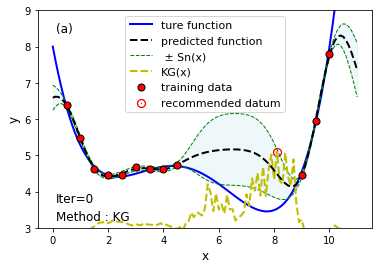

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.2]
--------------Draw samples-------------
real std of added datum: 0.15811388300841897
1 -th sampling, result =  3.49149403892339
2 -th sampling, result =  3.8549425356081497
3 -th sampling, result =  3.6026926871082274
4 -th sampling, result =  3.7222709595617354
5 -th sampling, result =  3.7913619630808224
evaluated mean of added datum: [3.69255244]
evaluated std of added datum: 0.13077944122932939
---------------------------------------

2-th iteration 
 new added datum: (7.2, array([3.69255244]))


<Figure size 432x288 with 0 Axes>

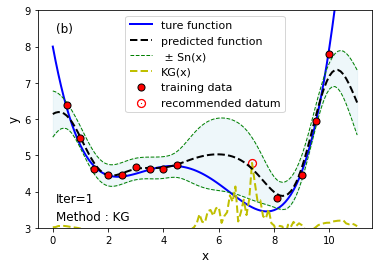

last response =  3.8186571784553656
added datum y =  [3.69255244] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [17]:
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    # opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    opt_noise = loocv_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Knowledge_G(MC_num=50)*10+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_loocv_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 